In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import sourmash
import sourmash.lca.lca_utils as lca_utils
import sourmash.tax.tax_utils as tax_utils
from tqdm import tqdm
tqdm.pandas()

In [2]:
sns.__version__

'0.11.0'

In [3]:
# for a stacked bar plot in seaborn, need to aggregate the percentages from strain --> superk

rankinfo = pd.read_csv('gtdb-rs202.rankinfo.aggregated.csv')
rankinfo.head()

,database,ksize,alphabet,alpha_ksize,scaled,rank,unique_rank_kmers,f_rank_kmers,aggregated_kmers,f_aggregated_kmers
0,gtdb-rs202.protein.k10.lca.json.gz,10,protein,protein-k10,1000,strain,16070147,0.589554,16070147,0.589554
1,gtdb-rs202.protein.k10.lca.json.gz,10,protein,protein-k10,1000,species,5693636,0.208878,21763783,0.798432
2,gtdb-rs202.protein.k10.lca.json.gz,10,protein,protein-k10,1000,genus,3066688,0.112505,24830471,0.910938
3,gtdb-rs202.protein.k10.lca.json.gz,10,protein,protein-k10,1000,family,681009,0.024984,25511480,0.935921
4,gtdb-rs202.protein.k10.lca.json.gz,10,protein,protein-k10,1000,order,200888,0.007370,25712368,0.943291


In [35]:
# replace strain with genome
rankinfo['rank'] = rankinfo['rank'].replace({"strain": "genome"})
rankinfo.head()

,database,ksize,alphabet,alpha_ksize,scaled,rank,unique_rank_kmers,f_rank_kmers,aggregated_kmers,f_aggregated_kmers
0,gtdb-rs202.protein.k10.lca.json.gz,10,protein,protein-k10,1000,genome,16070147,0.589554,16070147,0.589554
1,gtdb-rs202.protein.k10.lca.json.gz,10,protein,protein-k10,1000,species,5693636,0.208878,21763783,0.798432
2,gtdb-rs202.protein.k10.lca.json.gz,10,protein,protein-k10,1000,genus,3066688,0.112505,24830471,0.910938
3,gtdb-rs202.protein.k10.lca.json.gz,10,protein,protein-k10,1000,family,681009,0.024984,25511480,0.935921
4,gtdb-rs202.protein.k10.lca.json.gz,10,protein,protein-k10,1000,order,200888,0.007370,25712368,0.943291


In [4]:
ascending_taxlist = list(tax_utils.ascending_taxlist(include_strain=False))
ascending_taxlist = ['genome'] + ascending_taxlist
ascending_taxlist

['genome',
 'species',
 'genus',
 'family',
 'order',
 'class',
 'phylum',
 'superkingdom']

In [5]:
taxlist = list(lca_utils.taxlist(include_strain=False))
taxlist.append('genome')
taxlist

['superkingdom',
 'phylum',
 'class',
 'order',
 'family',
 'genus',
 'species',
 'genome']

In [6]:
sns.set(style='white')

In [7]:
rank_colors = {"superkingdom": "#a1d99b",
               "phylum": "#a1d99b", 
               "class": "#74c476", 
               "order": "#31a354", 
               "family": "#006d2c", 
               "genus": "#006d2c",
               "species":"#9e9ac8", 
               "genome": "#756bb1"}


In [8]:
colors = sns.color_palette('viridis', 8).as_hex()
print(colors)

['#482878', '#3e4989', '#31688e', '#26828e', '#1f9e89', '#35b779', '#6ece58', '#b5de2b']


In [9]:
rank_colors = dict(zip(ascending_taxlist, sns.color_palette('Set2', 8).as_hex()))
rank_colors

{'genome': '#66c2a5',
 'species': '#fc8d62',
 'genus': '#8da0cb',
 'family': '#e78ac3',
 'order': '#a6d854',
 'class': '#ffd92f',
 'phylum': '#e5c494',
 'superkingdom': '#b3b3b3'}

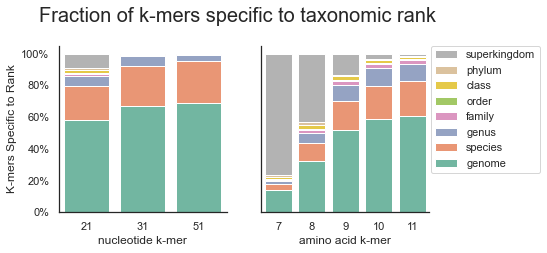

In [48]:
#data_to_plot = s1DF # select dataframe to plot with
alphabets = ['nucleotide','protein', ]
g = sns.FacetGrid(rankinfo, col = 'alphabet', sharex=False)# hue = 'rank', hue_order = taxlist,
for n, ax in enumerate(g.fig.axes):
    alpha = alphabets[n]
    dset = rankinfo[rankinfo['alphabet'] == alpha]
    for idx, rank in enumerate(taxlist):
        ds = dset[dset['rank'] == rank]
        ds.set_index('database', inplace=True)
        #print(ds)
        bar1 = sns.barplot(data=ds, ax=ax , x="ksize",  y="f_aggregated_kmers", label=rank, color=rank_colors[rank])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    #ax.set_title(alpha, size=12)
    if n == 0:
        ax.set_ylabel("K-mers Specific to Rank", size=12)      
        ax.axes.get_xaxis().set_label_text("nucleotide k-mer")
    if n == 1:
        ax.yaxis.get_label().set_visible(False)
        ax.axes.get_xaxis().set_label_text("amino acid k-mer")
        #ax.yaxis.set_label_text('Percent K-mers Specific at Rank')#.set_visible(False)    


# legend
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
#g = sns.factorplot(data=rankinfo, kind='bar', x="ksize", y="f_aggregated_kmers")#,multiple='stack')#, col="alphabet", hue="rank")#, palette="GnBu_d")
#g.set(xlim=(0, 0.55), ylim=(0, 0.55), xticks=np.arange(0, 0.60, 0.1), yticks=np.arange(0, 0.60, 0.1))
#xlim=None
#for ax in g.fig.axes:
#    if not xlim:
#        xlim =ax.get_xlim()
#        ylim = ax.get_ylim()
#    ax.plot(xlim, ylim, ls="--", c=".3")

g.fig.suptitle("Fraction of k-mers specific to taxonomic rank", x=0.5, y=1.10, size=20)
g.savefig("gtdb-rs202.lca_f_aggregated_kmers.pdf",bbox_inches='tight')
g.savefig("gtdb-rs202.lca_f_aggregated_kmers.png",bbox_inches='tight')

<AxesSubplot:xlabel='alpha_ksize', ylabel='f_rank_kmers'>

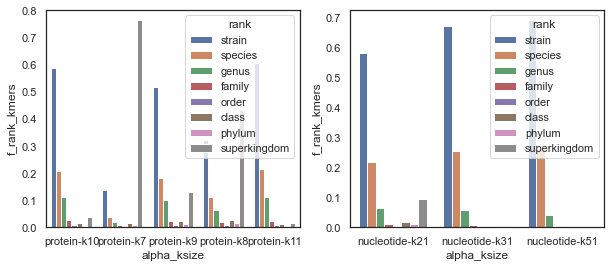

In [15]:
#g = sns.FacetGrid(rankinfo, col = "alphabet", hue = "rank")
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.barplot(ax=axes[0], data=rankinfo[rankinfo['alphabet']=="protein"], x='alpha_ksize', y='f_rank_kmers', hue='rank')
sns.barplot(ax=axes[1], data=rankinfo[rankinfo['alphabet']=="nucleotide"], x='alpha_ksize', y='f_rank_kmers', hue='rank')


#sea.map(sns.barplot, "alpha_ksize", "f_rank_kmers", alpha = .8)

#fig, axs = plt.subplots(2, figsize=(7,7))
#sns.barplot(data=rankinfo, x="sepal_length", kde=True, color="skyblue", ax=axs[0,1])
